[9.950e-321 9.955e-321 9.960e-321 9.965e-321 9.896e-321 9.901e-321
 9.906e-321 9.911e-321 9.916e-321 9.921e-321 9.926e-321 9.931e-321
 9.936e-321 9.941e-321 9.946e-321 9.881e-321 9.886e-321 9.891e-321
 9.862e-321 9.866e-321 9.871e-321 9.876e-321 9.842e-321 9.847e-321
 9.852e-321 9.857e-321]


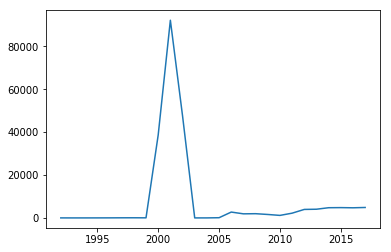

In [41]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# csv_reader = csv.reader(open('WFPVAM_FoodPrices_05-12-2017.csv'), delimiter = ',')
# for row in csv_reader:
#     print(row)
    
df = pd.read_csv('WFPVAM_FoodPrices_05-12-2017.csv', encoding='latin-1')

df.rename(columns={'adm0_id': 'country_ID', 'adm0_name': 'country', 'adm1_id' : 'district_ID', \
                   'adm1_name' : 'district', 'mkt_id' : 'market_ID', 'mkt_name' : 'market' , \
                   'cm_id' : 'product_ID','cm_name' : '_product', 'cur_id' : 'currency_ID', \
                   'cur_name' : 'currency', 'pt_id' : 'sale_ID', 'pt_name' : 'sale', 'um_id' : 'unit_ID', \
                   'um_name' : 'unit', 'mp_month' : 'month', 'mp_year' : 'year', 'mp_price' : 'price', \
                   'mp_commoditysource' : 'source'}, inplace=True)


afghan= df.loc[df['country'] == 'Afghanistan']
fayza = afghan.loc[afghan['market'] == 'Fayzabad'].loc[afghan['year'] == 2014].loc[afghan['_product'] == 'Bread']

years = np.sort(df.year.unique())
countries = df.country.unique()
districts = df.district.unique()


countries_districts = {}
for country in countries:
    regions = df.loc[df['country'] == country].district.unique().tolist()
#     print(country, regions)
    countries_districts[country] = regions
    

means = np.empty(np.size(years))
print(means)
for i in range(len(years)):
    year = years[i]
    prices = df.loc[df['year'] == year].price
    mean = np.mean(prices)
    means[i] = mean

plt.plot(years, means)
plt.show()



